In [32]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("olcaybolat1/dermatology-dataset-classification")
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_name = filename
        break
csv_file_path = os.path.join(path, csv_file_name)
print("CSV file path:", csv_file_path)
data = pd.read_csv(csv_file_path)
data.head()

CSV file path: /root/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5/dermatology_database_1.csv


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [33]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

# Replace '?' with NaN
data = data.replace('?', np.nan)

# Convert all columns to numeric, coercing errors to NaN
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Impute NaN values with the mean of each column
data = data.fillna(data.mean())

X = data.drop(columns=['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)


SVM Accuracy: 0.7297297297297297
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.97      0.95        31
           2       0.35      1.00      0.51         9
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.73        74
   macro avg       0.49      0.61      0.52        74
weighted avg       0.64      0.73      0.66        74



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

Random Forest Accuracy: 0.9864864864864865
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [35]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(random_state=42, contamination=0.05)
outlier_labels = iso_forest.fit_predict(X)
outliers = outlier_labels == -1

# Remove outliers
X_cleaned = X[~outliers]
y_cleaned = y[~outliers]

# Train-test split on cleaned data
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Train SVM on cleaned data
svm_model_cleaned = SVC(random_state=42)
svm_model_cleaned.fit(X_train_cleaned, y_train_cleaned)
svm_predictions_cleaned = svm_model_cleaned.predict(X_test_cleaned)
svm_accuracy_cleaned = accuracy_score(y_test_cleaned, svm_predictions_cleaned)
svm_report_cleaned = classification_report(y_test_cleaned, svm_predictions_cleaned)
print("SVM Accuracy after removing outliers:", svm_accuracy_cleaned)
print("SVM Classification Report after removing outliers:\n", svm_report_cleaned)

# Train Random Forest on cleaned data
rf_model_cleaned = RandomForestClassifier(random_state=42)
rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)
rf_predictions_cleaned = rf_model_cleaned.predict(X_test_cleaned)
rf_accuracy_cleaned = accuracy_score(y_test_cleaned, rf_predictions_cleaned)
rf_report_cleaned = classification_report(y_test_cleaned, rf_predictions_cleaned)
print("Random Forest Accuracy after removing outliers:", rf_accuracy_cleaned)
print("Random Forest Classification Report after removing outliers:\n", rf_report_cleaned)


SVM Accuracy after removing outliers: 0.7142857142857143
SVM Classification Report after removing outliers:
               precision    recall  f1-score   support

           1       0.81      1.00      0.90        22
           2       0.39      0.90      0.55        10
           3       1.00      1.00      1.00        16
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        13
           6       0.75      1.00      0.86         3

    accuracy                           0.71        70
   macro avg       0.49      0.65      0.55        70
weighted avg       0.57      0.71      0.63        70

Random Forest Accuracy after removing outliers: 0.9714285714285714
Random Forest Classification Report after removing outliers:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00        16
  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


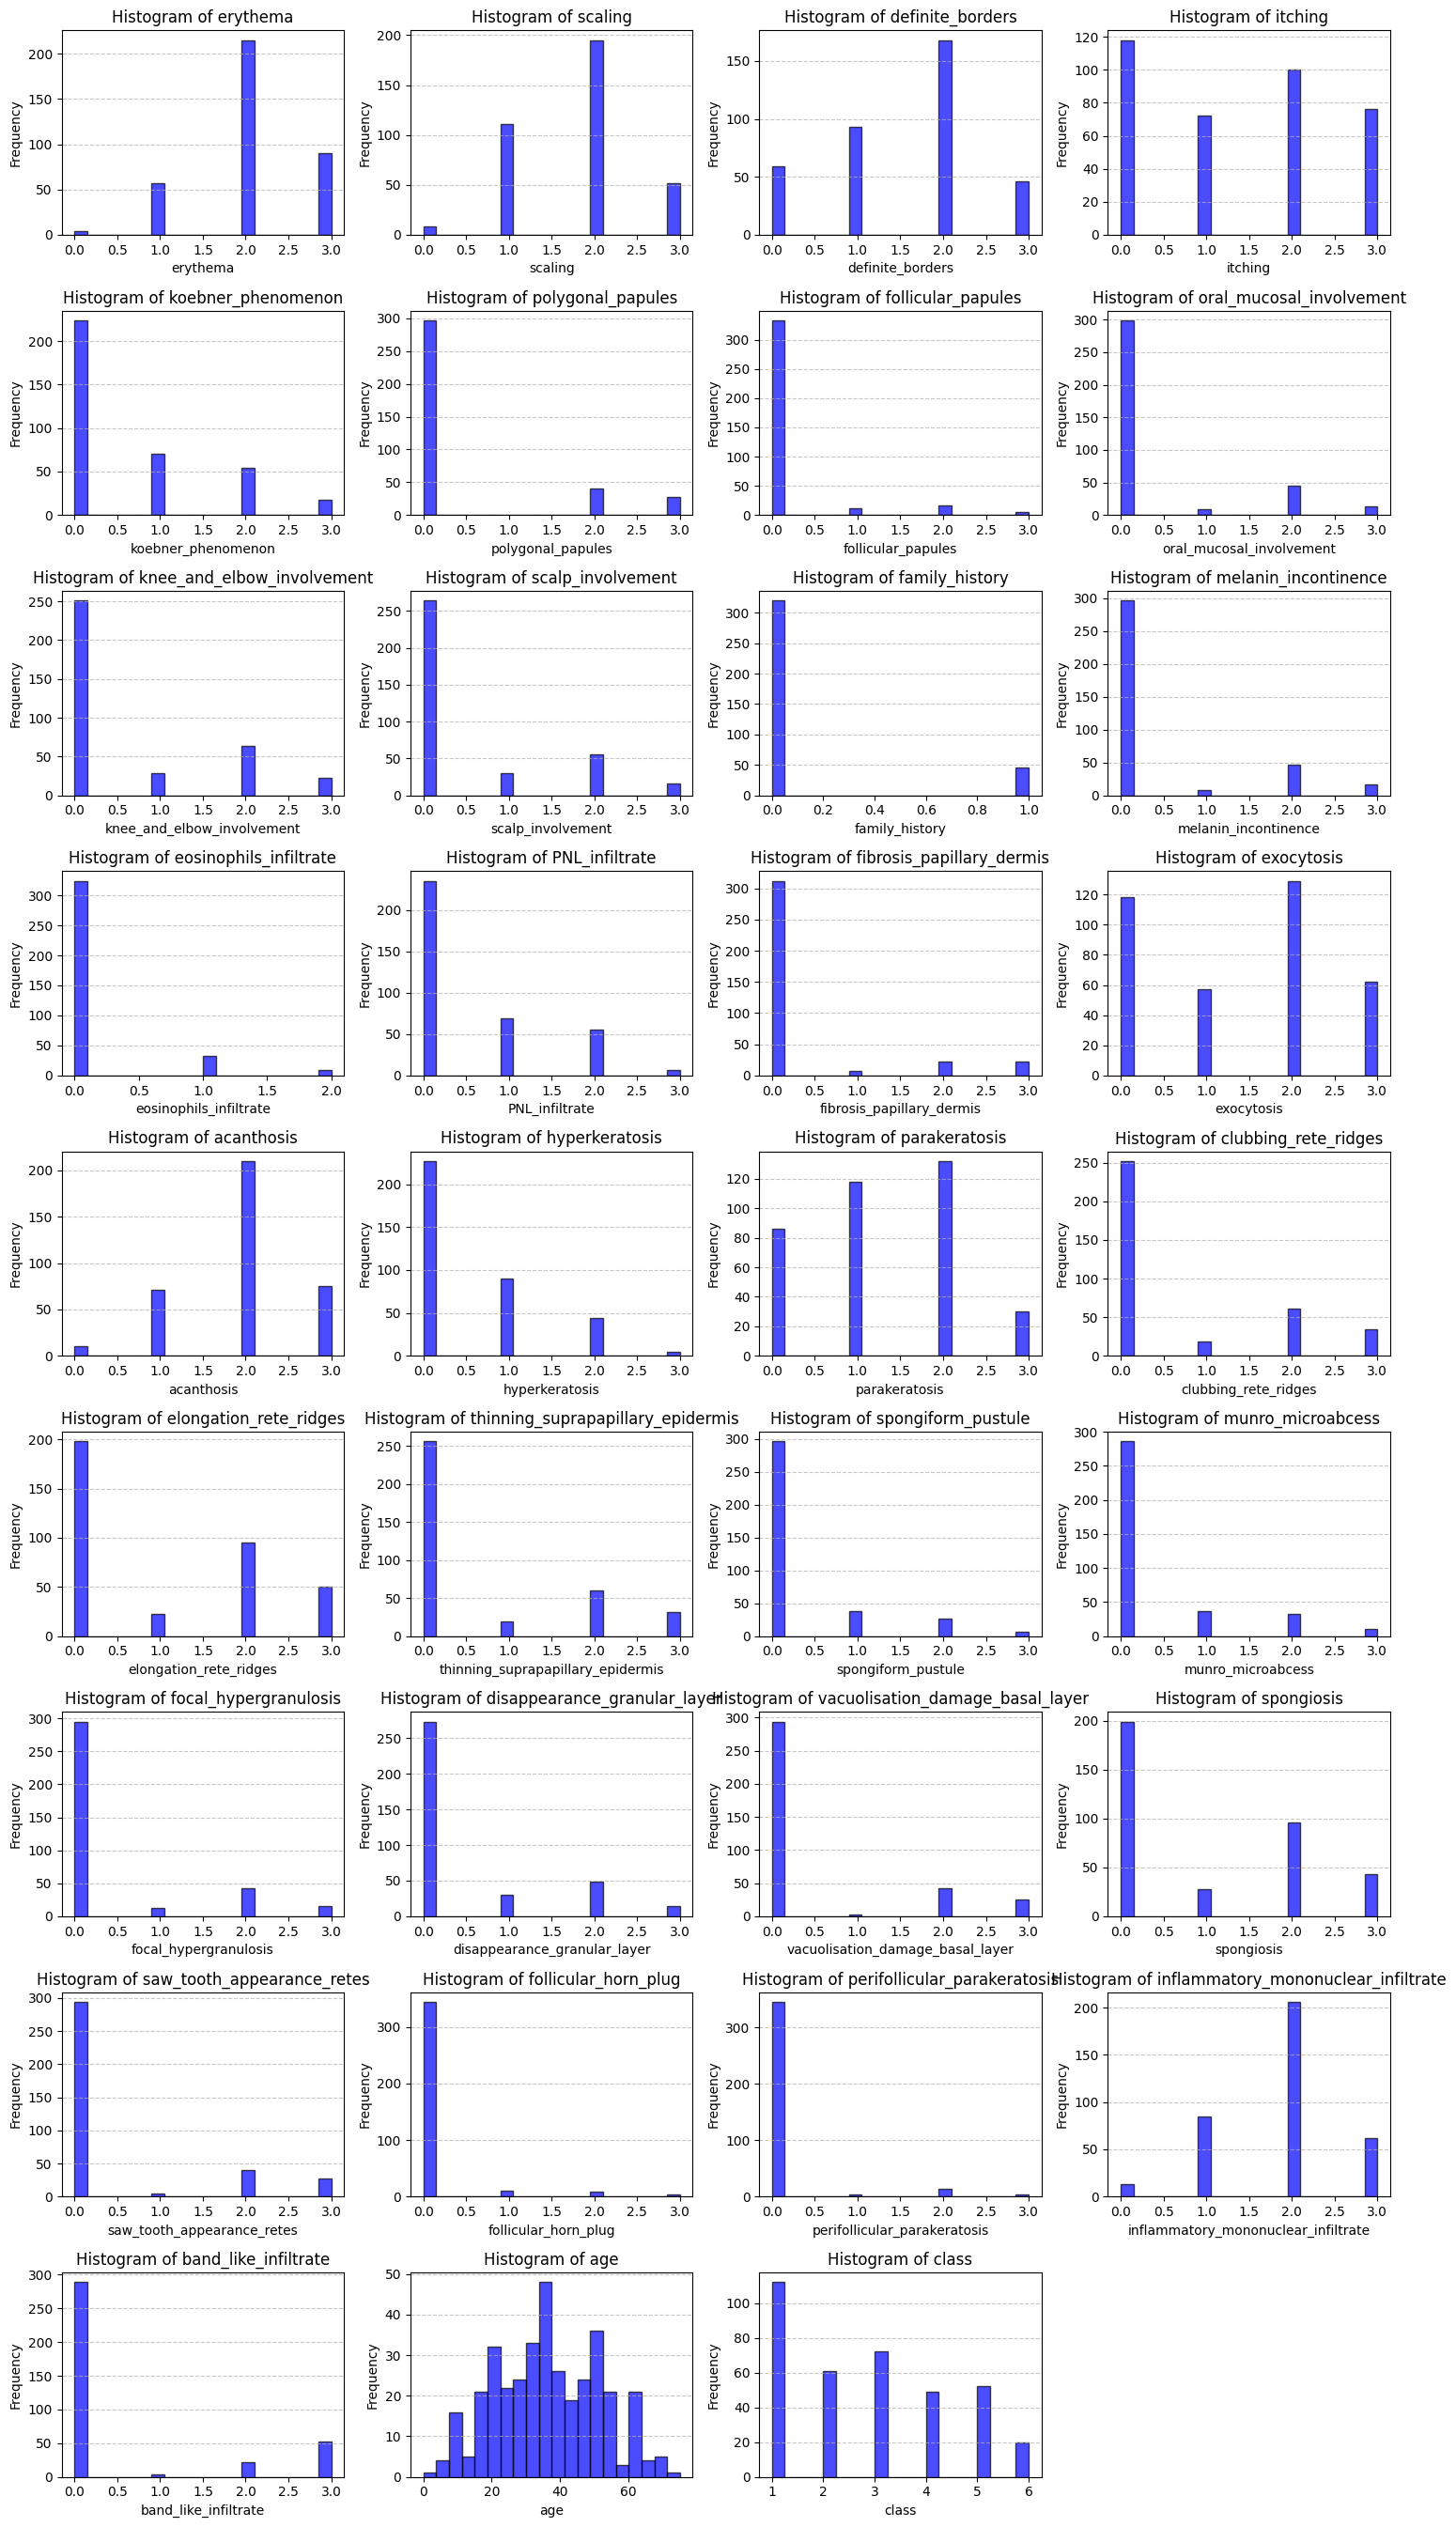

In [36]:
#Plot histograms for each column
import matplotlib.pyplot as plt
num_columns = 4
num_rows = int(np.ceil(len(data.columns) / num_columns))
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 3))
axes = axes.flatten()

for idx, column in enumerate(data.columns):
    axes[idx].hist(data[column], bins=20, alpha=0.7, color='blue', edgecolor='black')
    axes[idx].set_title(f"Histogram of {column}")
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel("Frequency")
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for idx in range(len(data.columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()